In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
csv_path = os.path.join('..','datasets','raw','data.csv')
df = pd.read_csv(csv_path)
df.sample(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11537,Scion,xA,2005,regular unleaded,108.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,35,27,105,13330
10480,Acura,TL,2013,premium unleaded (recommended),280.0,6.0,AUTOMATIC,front wheel drive,4.0,"Luxury,Performance",Midsize,Sedan,29,20,204,37405
6727,Nissan,Maxima,2014,premium unleaded (recommended),290.0,6.0,AUTOMATIC,front wheel drive,4.0,Performance,Midsize,Sedan,26,19,2009,34380
2298,GMC,Canyon,2016,regular unleaded,305.0,6.0,AUTOMATIC,four wheel drive,4.0,NaN,Compact,Extended Cab Pickup,24,17,549,35665
8213,Dodge,Ram Van,2000,regular unleaded,225.0,8.0,AUTOMATIC,rear wheel drive,3.0,NaN,Large,Cargo Van,17,12,1851,2422
1138,GMC,Acadia Limited,2017,regular unleaded,281.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,549,45850
11375,Acura,Vigor,1992,regular unleaded,176.0,5.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,18,204,2000
10559,Chrysler,Town and Country,2015,flex-fuel (unleaded/E85),283.0,6.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Passenger Minivan,25,17,1013,31465
1696,Mazda,B-Series Pickup,1999,regular unleaded,160.0,6.0,MANUAL,four wheel drive,4.0,NaN,Compact,Extended Cab Pickup,19,15,586,3538
5300,Mercedes-Benz,GLA-Class,2016,premium unleaded (required),375.0,4.0,AUTOMATED_MANUAL,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Compact,4dr SUV,29,22,617,49580


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
my_variables = ['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']
cars = df[my_variables].copy()

# Lowercase the column names and replace spaces with underscores
cars.columns = cars.columns.str.lower().str.replace(' ','_')
categorical_columns = list(cars.dtypes[cars.dtypes == 'object'].index)

for c in categorical_columns:
    cars[c] = cars[c].str.lower().str.replace(' ', '_')
    
cars.sample(5)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
11023,toyota,tundra,2017,381.0,8.0,automatic,extended_cab_pickup,17,13,42330
5859,subaru,impreza_wrx,2014,305.0,4.0,manual,sedan,23,17,37845
6654,chevrolet,malibu_hybrid,2009,164.0,4.0,automatic,sedan,34,26,25555
1896,volkswagen,beetle,2015,170.0,4.0,manual,2dr_hatchback,33,24,20695
1544,cadillac,ats,2016,272.0,4.0,automatic,sedan,31,22,46110


In [5]:
# Lowercase the column names and replace spaces with underscores
cars.columns = cars.columns.str.lower().str.replace(' ','_')

In [6]:
# View missing values
cars.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [7]:
# FIll the missing values with 0
cars[['engine_hp','engine_cylinders']] = cars[['engine_hp','engine_cylinders']].fillna(value=0)

In [8]:
msrp_mean = cars['msrp'].mean()
# Binarizing msrp
cars['above_average'] = (cars['msrp'] <= msrp_mean).astype(int)
cars['above_average']

0        0
1        0
2        1
3        1
4        1
        ..
11909    0
11910    0
11911    0
11912    0
11913    1
Name: above_average, Length: 11914, dtype: int64

In [9]:
#features = cars.drop('msrp', axis=1).copy()
#target = cars['msrp'].copy()

df_full_train, df_test = train_test_split(cars, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

df_train.shape[0], df_test.shape[0], df_val.shape[0]

(7148, 2383, 2383)

In [10]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([2.15181772e-005, 1.00000000e+000, 9.99999965e-001, ...,
       1.00000000e+000, 3.31836817e-111, 1.00000000e+000])

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

prob = (y_pred >= .5).astype(int)
acc = accuracy_score(y_val, prob).round(1)
prec = precision_score(y_val, prob).round(1)
rec = recall_score(y_val, prob).round(1)

print(acc)
print(prec)
print(rec)


1.0
1.0
1.0


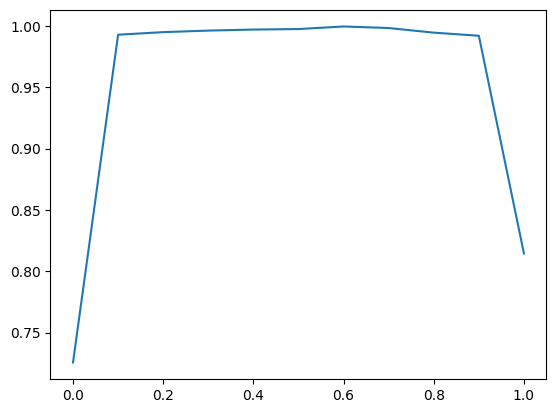

In [11]:
thresholds = np.linspace(0, 1, 11)

accuracies = []
for t in thresholds:
    prob = y_pred >= t
    acc = accuracy_score(y_val, prob >= t)
    accuracies.append(acc)
    

plt.plot(thresholds, accuracies)

### Precision and Recall

In [12]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

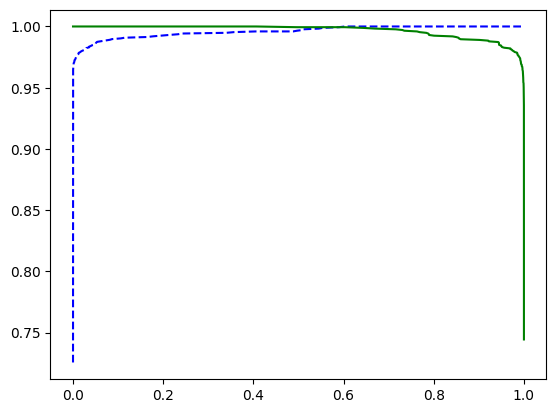

In [13]:
precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred)

def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recalls")


plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

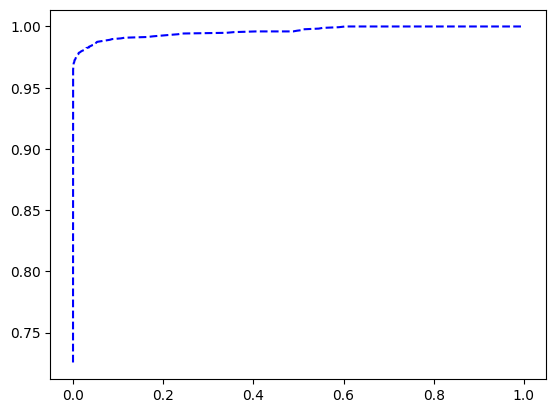

In [14]:

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")

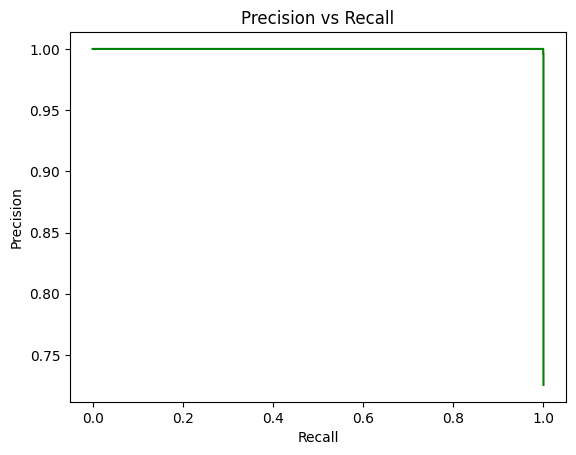

In [15]:
plt.plot(recalls, precisions, "g-")
plt.title("Precision vs Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()